In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_data = pd.read_csv(r'zomato.csv')

In [3]:
raw_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [17]:
raw_data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [19]:
features_na = [feature for feature in raw_data.columns if raw_data[feature].isna().sum()>0]

In [32]:
for feature in features_na:
    print("{} has {}% missing values".format(feature,np.round(raw_data[feature].isna().sum()/len(raw_data)*100,4)))

rate has 0.0% missing values
phone has 1.8934% missing values
location has 0.0% missing values
rest_type has 0.3436% missing values
dish_liked has 46.2724% missing values
cuisines has 0.025% missing values
approx_cost(for two people) has 0.5735% missing values


In [33]:
df = raw_data.copy()

In [34]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51709    3.7 /5
51711    2.5 /5
51712    3.6 /5
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 43942, dtype: object

In [39]:
def split(x):
    return x.split('/')[0]

In [40]:
df['rate'] = df['rate'].apply(split)

In [44]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [43]:
df['rate'].replace('NEW',0,inplace=True)
df['rate'].replace('-',0,inplace=True)

In [46]:
df['rate']=df['rate'].astype(float)

In [47]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [59]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()

In [61]:
df_rate.columns = ['Restaurant','Avg Rating']

In [62]:
import seaborn as sns

/Users/oj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg Rating', ylabel='Density'>

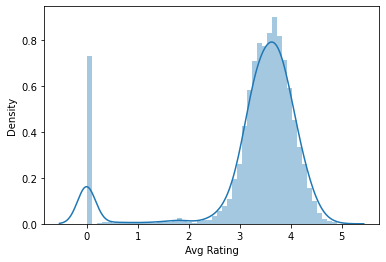

In [63]:
sns.distplot(df_rate['Avg Rating'])

In [68]:
top_20 = df['name'].value_counts()[0:20]

Text(0.5, 0, 'Number of Outlets')

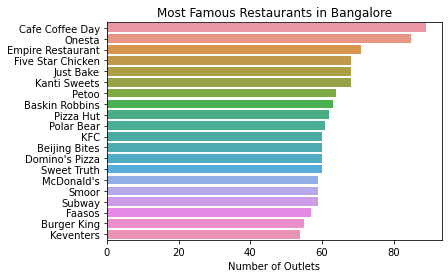

In [71]:
sns.barplot(x=top_20,y=top_20.index)
plt.title('Most Famous Restaurants in Bangalore')
plt.xlabel('Number of Outlets')

In [78]:
x = df['online_order'].value_counts()
labels = ['Accepted','Not Accepted']

In [73]:
import plotly.express as px

In [80]:
px.pie(df,values = x,labels = labels,title='Online Orders')

In [83]:
x = df['book_table'].value_counts()
labels = ['No Booking','Booking']
x

No     37509
Yes     6433
Name: book_table, dtype: int64

In [84]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [85]:
trace = go.Pie(labels=labels, values=x, hoverinfo = 'label+percent',textinfo='value')
iplot([trace])

In [103]:
df['rest_type'].isna().sum()

151

In [109]:
df.dropna(inplace=True, subset=['rest_type'])

In [110]:
df['rest_type'].isna().sum()

0

In [111]:
len(df['rest_type'].unique())

87

In [113]:
trace1=go.Bar(x=df['rest_type'].value_counts().nlargest(20).index,
              y=df['rest_type'].value_counts().nlargest(20) )

In [114]:
iplot([trace1])

In [118]:
df.groupby('name')['votes'].sum().nlargest(20)

name
Onesta                         347520
Truffles                       301059
Empire Restaurant              229808
Hammered                       180602
The Black Pearl                172122
Meghana Foods                  129557
Barbeque Nation                108425
Smally's Resto Cafe            102877
Byg Brewski Brewing Company     99531
Gilly's Restobar                98808
Arbor Brewing Company           92362
House Of Commons                90573
Chutney Chang                   89910
Fenny's Lounge And Kitchen      89183
AB's - Absolute Barbecues       86418
Church Street Social            83179
Prost Brew Pub                  78609
The Biere Club                  76649
Stoner                          75194
Koramangala Social              75021
Name: votes, dtype: int64

In [120]:
trace2 = go.Bar(x=df.groupby('name')['votes'].sum().nlargest(20).index,
               y=df.groupby('name')['votes'].sum().nlargest(20))
iplot([trace2])

In [129]:
len(df['location'].unique())

92

In [133]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [142]:
location=[]
rest = []
for key,location_df in df.groupby('location'):
    location.append(key)
    rest.append(len(location_df['name'].unique()))

In [181]:
df_full = pd.DataFrame(zip(location,rest))
df_full.columns=['location','rest']
df_full.reset_index(drop=True)
df_full.head()

,location,rest
0,BTM,578
1,Banashankari,238
2,Banaswadi,150
3,Bannerghatta Road,361
4,Basavanagudi,195


In [191]:
df_full.sort_values('rest',ascending=False).reset_index(drop=True)

,location,rest
0,Whitefield,633
1,BTM,578
2,HSR,551
3,Marathahalli,520
4,Electronic City,515
...,...,...
87,Central Bangalore,2
88,Rajarajeshwari Nagar,2
89,Kengeri,1
90,Nagarbhavi,1


In [193]:
trace3= go.Bar(x=df_full['location'][0:10],y=df_full['rest'][0:10])
iplot([trace3])